In [1]:
import argparse
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline

## Jobs
1497990: canonical, works well  
1497123: canonical, works bad  
1497977: canonical, works well but slower than 1497990

In [2]:
import argparse
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline

In [3]:
def net_shape(net):
    return jax.tree_map(lambda x: x.shape, net)

In [13]:
# save_path = "/home/paul/Results/1493061" # no critic
# save_path = "/home/paul/Results/1493081" # bad
save_path = "/home/paul/Results/1105500" 
# save_path = "/home/paul/Results/1123549" 
# save_path = "/home/paul/Results/1123550" 

import jax.numpy as jnp
import json

# Load config
print(save_path + "/config.json")
with open(save_path + "/config.json", "r") as f:
    args = json.load(f)
    # Lists to tuples
    for k, v in args.items():
        if isinstance(v, list):
            args[k] = tuple(v)
    args = argparse.Namespace(**args)
    args.wandb = ""
    print(args)

default = {
    "surrogate_batch": 1024,
    "surrogate": False,
    # "deterministic": True,
    # "es": "cmaes"
}
# Replace missing values with default
for k, v in default.items():
    if not hasattr(args, k):
        setattr(args, k, v)

/home/paul/Results/1105500/config.json
Namespace(env_name='halfcheetah_uni', episode_length=1000, evals=100000, seed=2, policy_hidden_layer_sizes=(128, 128), critic_hidden_layer_sizes=(256, 256), deterministic=True, num_init_cvt_samples=50000, num_centroids=1024, min_bd=0.0, max_bd=1.0, es='canonical', pop=100, es_sigma=1.0, sample_mirror=True, sample_rank_norm=True, adam_optimizer=True, learning_rate=0.01, l2_coefficient=0.02, nses_emitter=False, novelty_nearest_neighbors=10, rl=True, testrl=False, carlies=False, elastic_pull=0, discount=0.99, actor_injection=True, injection_clip=False, nb_injections=1, critic_training=1000, pg_training=1000, actor_lr=0.001, critic_lr=0.0003, surrogate=True, surrogate_batch=16384, surrogate_omega=0.0, output='/tmpdir/templier/QDax_results/1105500', plot=True, wandb='', tag='rl_lr', jobid='1105500', log_period=1, debug=False, logall=True, num_gens=1000, algo='Canonical-Surrogate-AI', config='Canonical 100 - σ 1.0 | AI 1 | TD3 1000 - PG 1000 - lr A 0.00

In [14]:
from qdax.core.rl_es_parts.es_setup import setup_es, fill_default
args.env_name, args.config

('halfcheetah_uni',
 'Canonical 100 - σ 1.0 | AI 1 | TD3 1000 - PG 1000 - lr A 0.001 / C 0.0003 | ω 0.0 (16384)')

In [15]:
args = fill_default(args)
EM = setup_es(args)

Adding default argument policy_layer_number = 2
Adding default argument critic_layer_number = 2
Adding default argument groupsort = False
Adding default argument groupsort_k = 1
Adding default argument activation = relu
Adding default argument explo_noise = 0.0
Adding default argument nses = False
Adding default argument pull_type = default
Adding default argument es_target = False
Adding default argument spearman = False
Imported modules
Policy network MLP 2x128 relu -> tanh
Critic network MLP 2x256 relu -> none
Doing actor injection x 1


TypeError: Argument 'MLP(
    # attributes
    layer_sizes = (128, 128, 6)
    activation = relu
    kernel_init = init
    final_activation = tanh
    bias = True
    kernel_init_final = None
)' of type <class 'qdax.core.neuroevolution.networks.networks.MLP'> is not a valid JAX type.

In [ ]:
es = EM.es
env = EM.env
policy_network = EM.policy_network
emitter = EM.emitter
emitter_state = EM.emitter_state
repertoire = EM.repertoire
random_key = EM.random_key
wandb_run  = EM. wandb_run
scoring_fn = EM.scoring_fn


def scores(fitnesses, descriptors) -> jnp.ndarray:
    return fitnesses

# emitter.es_emitter

In [ ]:
# Load all genomes of offspring
import glob
import re
import analysis.trajectory as traj
# import StepPathPCA, Path

In [ ]:
emitter.rl_emitter

AttributeError: 'CanonicalESEmitter' object has no attribute 'es_emitter'

In [25]:
# force reload of: from analysis.trajectory import StepPathPCA, Path
import importlib

importlib.reload(traj)
StepPathPCA, Path = traj.StepPathPCA, traj.Path

In [26]:
path_names = {
    "ES": save_path + "/gen_*_offspring.npy",
    "Actor": save_path + "/gen_*_actor.npy",
}

paths = [
    ["ES"],
    # ["Actor"],
    # ["ES", "Actor"],
]

n_points = 100
%matplotlib inline

for path in paths:
    pca = StepPathPCA([Path(path_names[p], name=p) for p in path], max_gens=100)
        # pca.sample_grid(n_points, dx=0.5)
        # # pca.genomes.shape, pca.samples.shape

        # unflatten_fn = jax.vmap(emitter.es_emitter.unflatten)
        # scoring_fn = EM.scoring_fn
        # pca.fitness_grid(unflatten_fn, scoring_fn);

        # pca.plot()
        # plt.title(f"{pca_method.__name__} {path}")
        # plt.show()

In [27]:
path_names = {
    "ES": save_path + "/gen_*_offspring.npy",
}

paths = [
    ["ES"],
    # ["Actor"],
    # ["ES", "Actor"],
]

n_points = 100
%matplotlib inline

backward_variance = []
forward_variance = []
total_variance = []
close_variance = []
# sliding_variance = []

path = Path(path_names["ES"], name="ES")
path_gens = path.gens
total_steps = len(path_gens)

steps = list(range(10, 100, 10)) + list(range(100, total_steps, 100))
steps =  list(range(100, total_steps, 100))
steps =  list(range(25, total_steps, 25))
steps = jnp.array(steps)
print(steps)

dims = [1, 3, 5, 10, 25]

for max_steps in steps:
    pca = StepPathPCA([path], max_gens=max_steps, dims=dims)
    backward_variance.append(pca.backward_variance)
    forward_variance.append(pca.forward_variance)
    total_variance.append(pca.total_variance)
    close_variance.append(pca.close_variance)
    # sliding_variance.append(pca.sliding_variance)

[ 25  50  75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450
 475 500 525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900
 925 950 975]


In [28]:
backward_variance = jnp.array(backward_variance)
forward_variance = jnp.array(forward_variance)
total_variance = jnp.array(total_variance)
close_variance = jnp.array(close_variance)
# sliding_variance = jnp.array(sliding_variance)

backward_variance.shape

(39, 5)

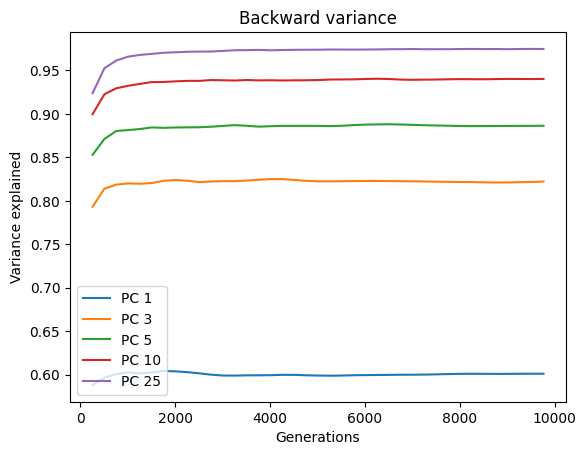

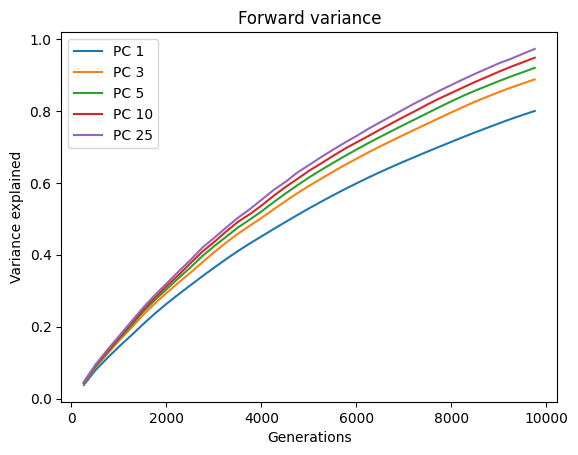

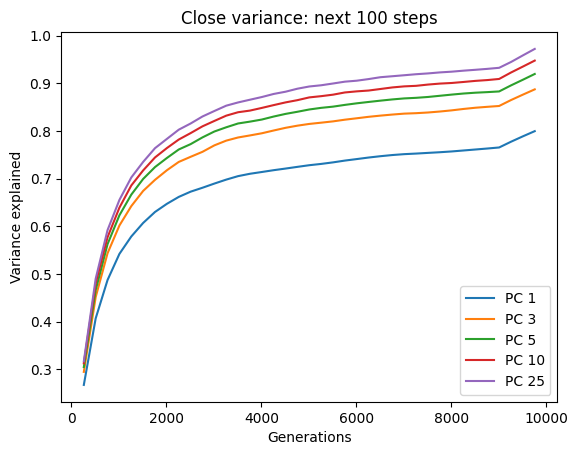

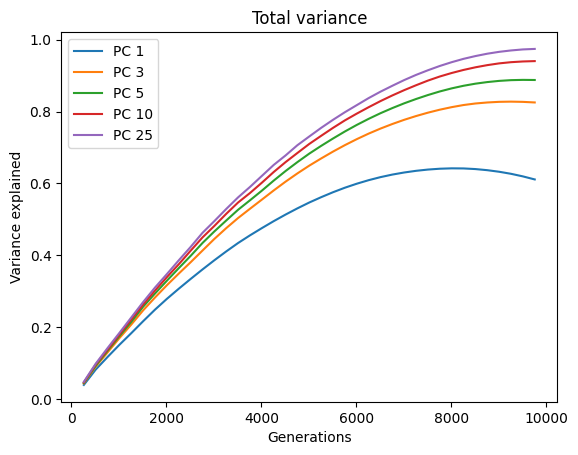

In [29]:
pc_dim = backward_variance.shape[1]

gens = jnp.array(path.gens)[jnp.array(steps)]

for i, dim in enumerate(dims):
    plt.plot(gens, backward_variance[:, i], label=f"PC {dim}")
plt.legend()
plt.xlabel("Generations")
plt.ylabel("Variance explained")
plt.title("Backward variance")
plt.show()


for i, dim in enumerate(dims):
    plt.plot(gens, forward_variance[:, i], label=f"PC {dim}")
plt.legend()
plt.xlabel("Generations")
plt.ylabel("Variance explained")
plt.title("Forward variance")
plt.show()

for i, dim in enumerate(dims):
    plt.plot(gens, close_variance[:, i], label=f"PC {dim}")
plt.legend()
plt.xlabel("Generations")
plt.ylabel("Variance explained")
plt.title("Close variance: next 100 steps")
plt.show()

# for i, dim in enumerate(dims):
#     plt.plot(gens, sliding_variance[:, i], label=f"PC {dim}")
# plt.legend()
# plt.xlabel("Generations")
# plt.ylabel("Variance explained")
# plt.title("Close variance: next 100 steps")
# plt.show()

for i, dim in enumerate(dims):
    plt.plot(gens, total_variance[:, i], label=f"PC {dim}")
plt.legend()
plt.xlabel("Generations")
plt.ylabel("Variance explained")
plt.title("Total variance")
plt.show()

In [16]:
unflatten_fn = jax.vmap(emitter.unflatten)
scoring_fn = EM.scoring_fn
key = jax.random.PRNGKey(args.seed)

path.evaluate(unflatten_fn, scoring_fn, key)
fitnesses = path.fitnesses

Text(0, 0.5, 'Fitness')

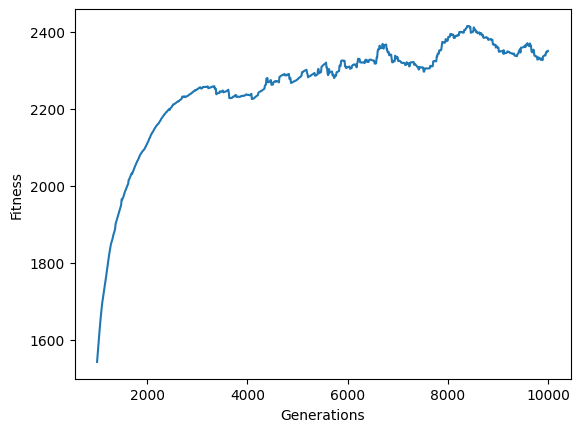

In [17]:
import jax.numpy as jnp

def rolling_window(a: jnp.ndarray, window: int):
    idx = jnp.arange(len(a) - window + 1)[:, None] + jnp.arange(window)[None, :]
    return a[idx]

def rolling_mean(a: jnp.ndarray, window: int):
    return jnp.mean(rolling_window(a, window), axis=1)

def rolling_max(a: jnp.ndarray, window: int):
    return jnp.max(rolling_window(a, window), axis=1)

window_size = 100

rolling_avg = rolling_mean(fitnesses, window_size)
rolling_gens = rolling_max(jnp.array(path.gens), window_size)
plt.plot(rolling_gens, rolling_avg, label="Fitness")
plt.xlabel("Generations")
plt.ylabel("Fitness")

In [18]:
dim_i = 0

for i, s in enumerate(steps):
    gen = path.gens[s]
    print(f"Step {s}: gen {gen}")
    # fit = rolling_avg[g]
    # close_var = close_variance[i, dim_i]
    # forward_var = forward_variance[i, dim_i]

Step 25: gen 260
Step 50: gen 510
Step 75: gen 760
Step 100: gen 1010
Step 125: gen 1260
Step 150: gen 1510
Step 175: gen 1760
Step 200: gen 2010
Step 225: gen 2260
Step 250: gen 2510
Step 275: gen 2760
Step 300: gen 3010
Step 325: gen 3260
Step 350: gen 3510
Step 375: gen 3760
Step 400: gen 4010
Step 425: gen 4260
Step 450: gen 4510
Step 475: gen 4760
Step 500: gen 5010
Step 525: gen 5260
Step 550: gen 5510
Step 575: gen 5760
Step 600: gen 6010
Step 625: gen 6260
Step 650: gen 6510
Step 675: gen 6760
Step 700: gen 7010
Step 725: gen 7260
Step 750: gen 7510
Step 775: gen 7760
Step 800: gen 8010
Step 825: gen 8260
Step 850: gen 8510
Step 875: gen 8760
Step 900: gen 9010
Step 925: gen 9260
Step 950: gen 9510
Step 975: gen 9760


/tmp/ipykernel_2941566/3520692021.py:17: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

/tmp/ipykernel_2941566/3520692021.py:18: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



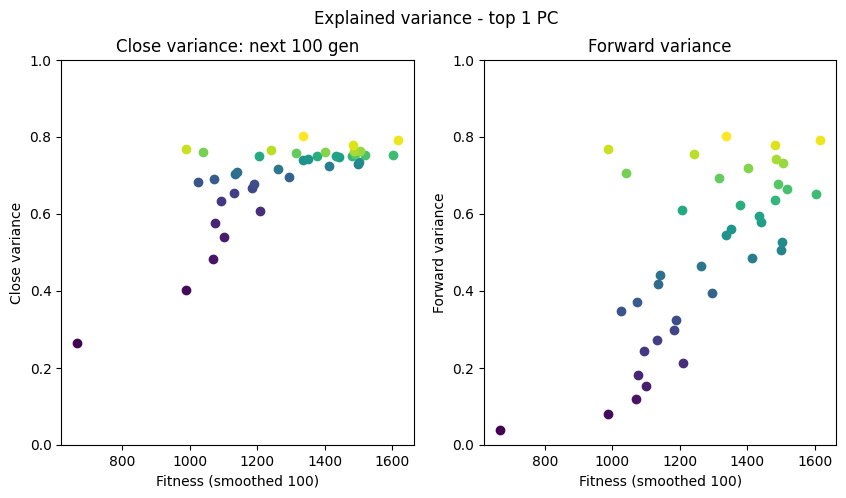

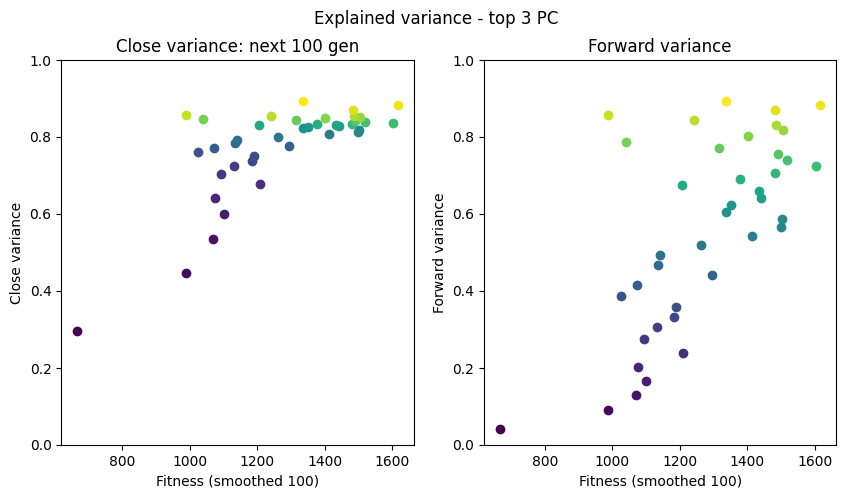

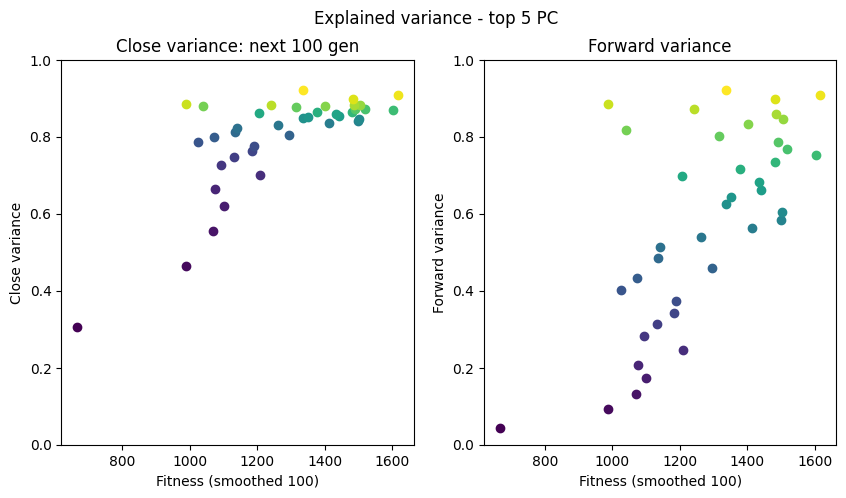

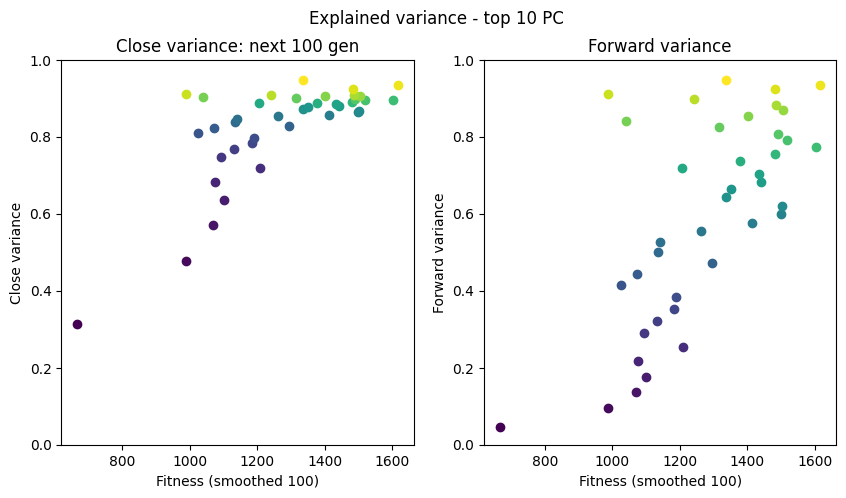

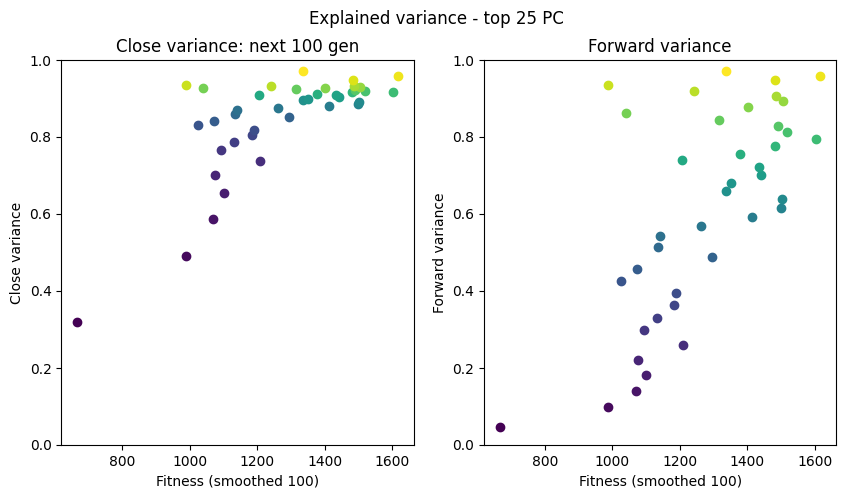

In [18]:
# dim_i = -1

for dim_i in range(len(dims)):
    # 2 plots same figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    # global title
    fig.suptitle(f"Explained variance - top {dims[dim_i]} PC")

    # Color by generation
    colors = plt.cm.viridis(jnp.linspace(0, 1, len(steps)))

    # get fitness at steps
    for i, g in enumerate(steps):
        gen = path.gens[g]
        fit = rolling_avg[g]
        close_var = close_variance[i, dim_i]
        forward_var = forward_variance[i, dim_i]
        ax1.scatter(fit, close_var, label=g, c=colors[i])
        ax2.scatter(fit, forward_var, label=g, c=colors[i])

    ax1.set_xlabel(f"Fitness (smoothed {window_size})")
    ax1.set_ylabel("Close variance")
    # title 
    ax1.set_title("Close variance: next 100 gen")

    # y between 0 and 1
    ax1.set_ylim(0, 1)
    ax2.set_ylim(0, 1)

    ax2.set_xlabel(f"Fitness (smoothed {window_size} steps)")
    ax2.set_ylabel("Forward variance")
    # title
    ax2.set_title("Forward variance")
    plt.show()

In [18]:
args.seed

0

In [25]:
pca.pca.transform([np.zeros(19718)])

array([[-48.9410171 , -33.80520435]])

In [44]:
pc1 = np.array(pca.pca.components_[0])
pc2 = np.array(pca.pca.components_[1])

In [45]:
pc1

array([-0.01769006, -0.02360567,  0.0159489 , ...,  0.00036907,
        0.01164459, -0.01041348], dtype=float32)

StepPathPCA ['ES', 'Actor'] both
[Path (ES) with 1001 genomes, Path (Actor) with 1001 genomes]
Explained variance [0.4466932  0.13580643]


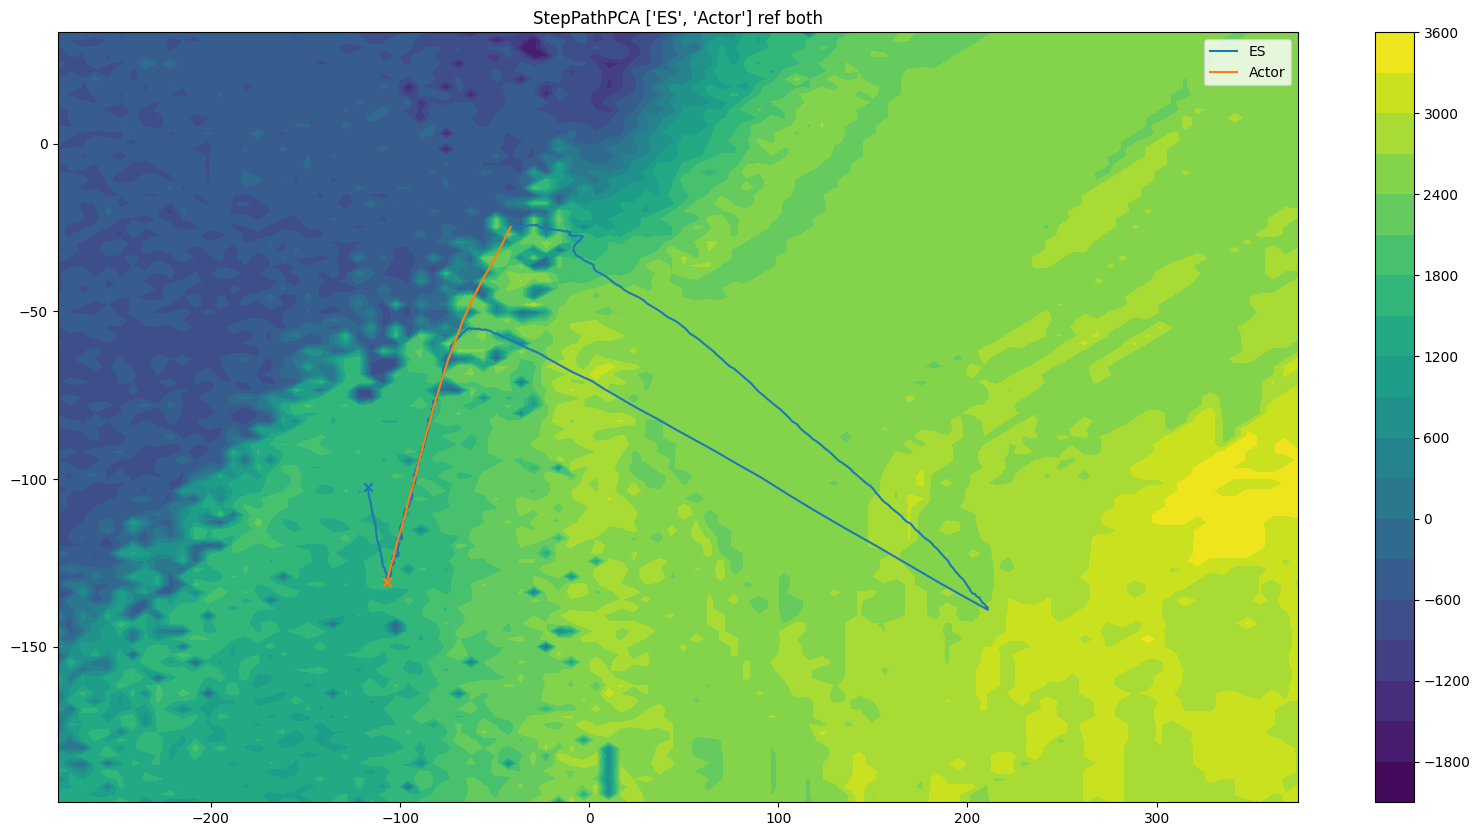

StepPathPCA ['ES', 'Actor'] ES
[Path (ES) with 1001 genomes, Path (Actor) with 1001 genomes]
Explained variance [0.5269873  0.09068517]


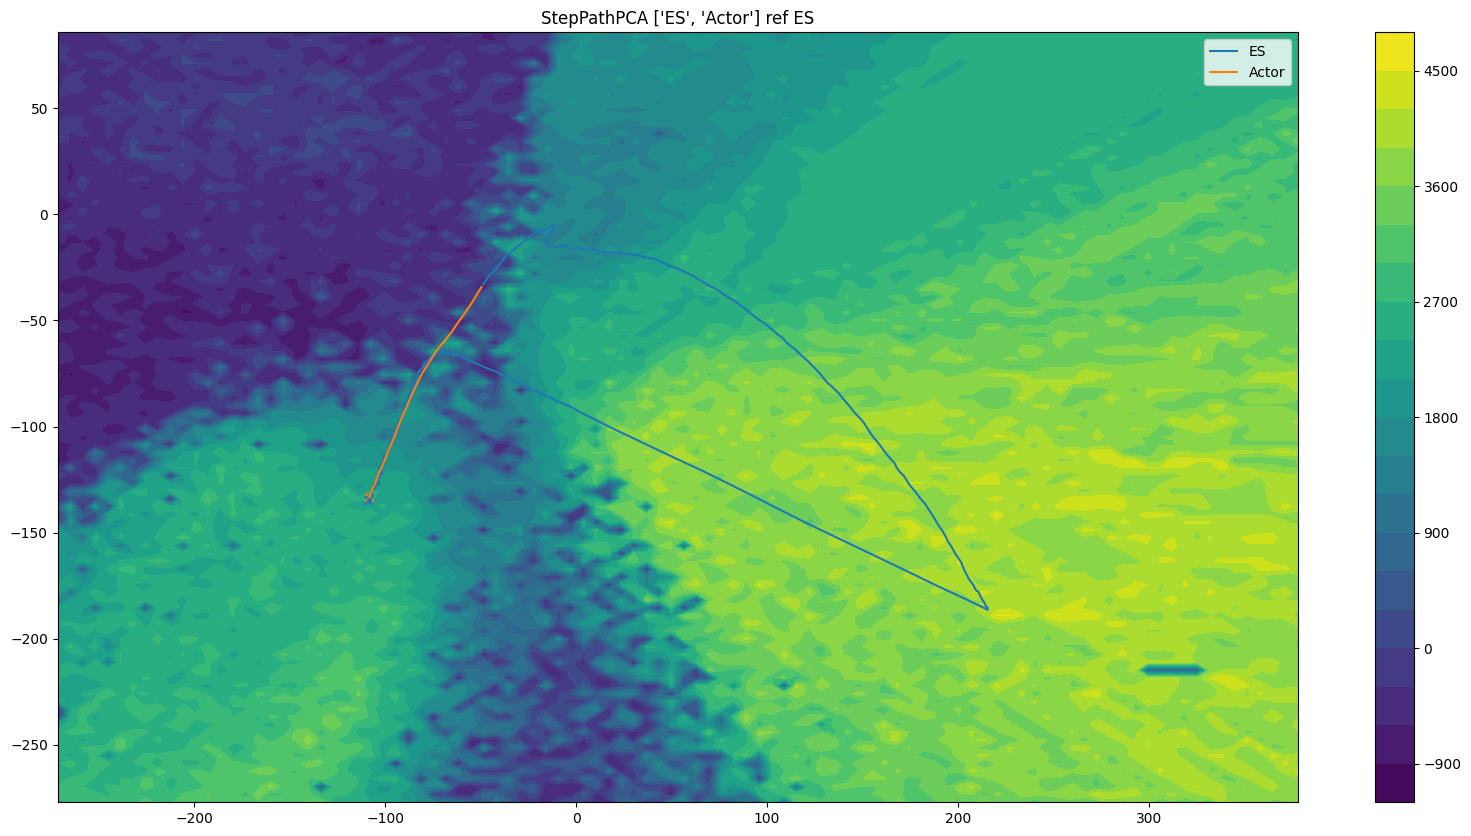

StepPathPCA ['ES', 'Actor'] Actor
[Path (ES) with 1001 genomes, Path (Actor) with 1001 genomes]
Explained variance [0.7824636  0.09133649]


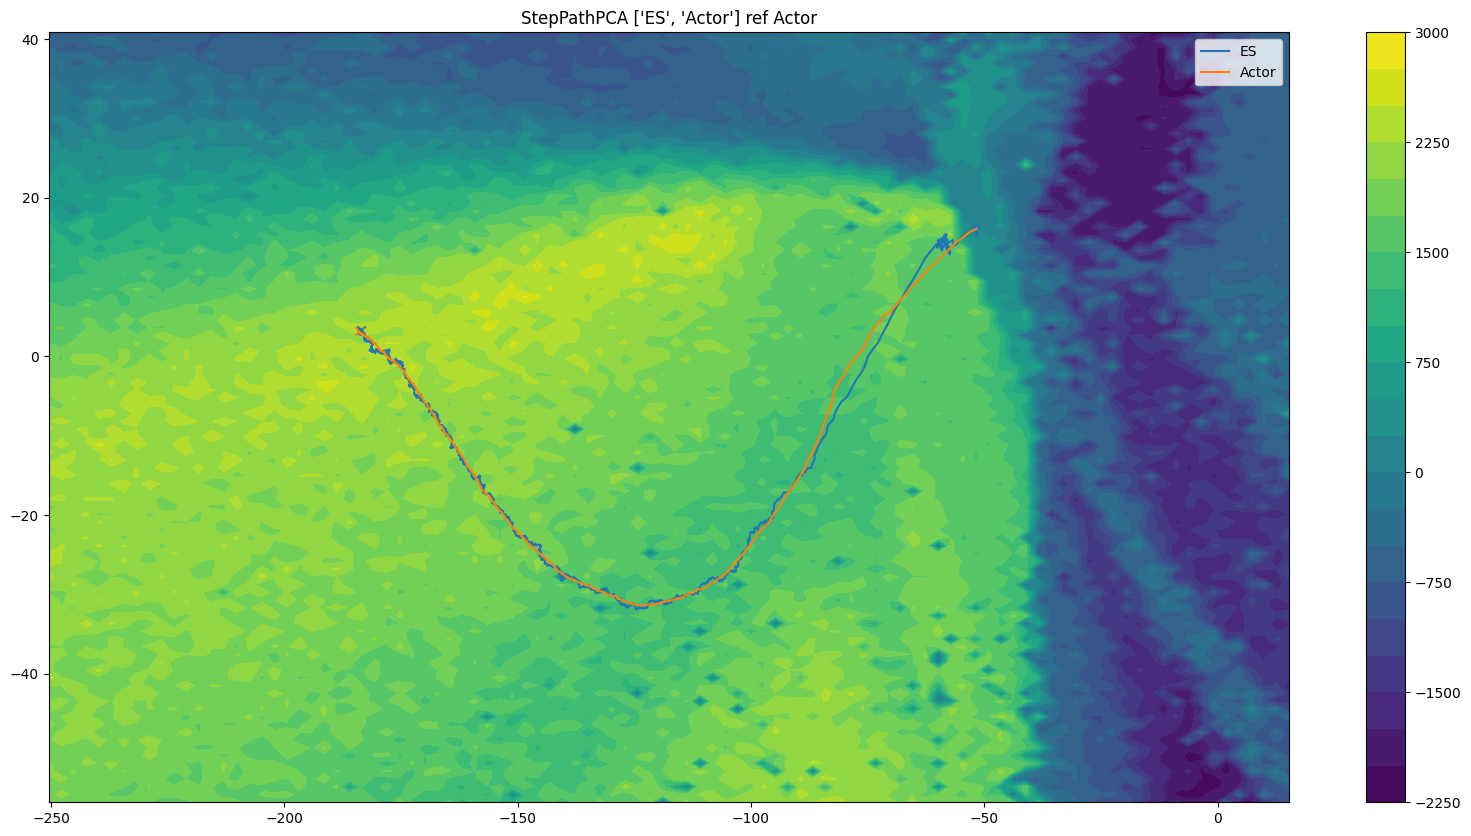

In [67]:
path_names = {
    "ES": save_path + "/gen_*_offspring.npy",
    "Actor": save_path + "/gen_*_actor.npy",
}

path = ["ES", "Actor"]

n_points = 100
for reference in [None, 0, 1]:
    print(pca_method.__name__, path, path[reference] if reference is not None else "both")
    paths = [Path(path_names[p], name=p) for p in path]
    print(paths)
    pca = StepPathPCA(
        paths, 
        reference=reference
        )

    pca.sample_grid(n_points, dx=0.5)
    # pca.genomes.shape, pca.samples.shape

    unflatten_fn = jax.vmap(emitter.es_emitter.unflatten)
    scoring_fn = EM.scoring_fn
    pca.fitness_grid(unflatten_fn, scoring_fn);

    pca.plot()
    plt.title(f"{pca_method.__name__} {path} ref {path[reference]if reference is not None else 'both'}")
    plt.show()

In [81]:
class MultiPOV_PCA:
    def __init__(self, paths):
        self.paths = paths
        self.pca = []
        for i in range(len(paths)):
            paths = [p.copy() for p in self.paths]
            p = StepPathPCA(paths, reference=i)
            print(p)
            self.pca.append(p)

    def sample_grid(self, n_points, dx=0.5):
        for p in self.pca:
            p.sample_grid(n_points, dx)

    def fitness_grid(self, unflatten_fn, scoring_fn):
        for p in self.pca:
            p.fitness_grid(unflatten_fn, scoring_fn)

    def plot(self):
        for p in self.pca:
            p.plot()
            plt.title(p)
            plt.show()

    def make_gif(self, save=None):
        n_axes = len(self.pca)
        fig, axes = plt.subplots(1, n_axes+1, figsize=(10*(n_axes + 1), 10))
        fit_ax = axes[-1]
        axes = axes[:-1]

        def init_func(i):
            ax = axes[i]
            pca = self.pca[i]

            n_points = int(jnp.sqrt(pca.true_fit.shape[0]))
            x = pca.samples[:, 0]
            x_grid = x.reshape((n_points, n_points))
            y = pca.samples[:, 1]
            y_grid = y.reshape((n_points, n_points))
            z_grid = pca.true_fit.reshape((n_points, n_points))
            ax.contourf(x_grid, y_grid, z_grid, 20, cmap="viridis", zorder=1)
            # colorbar
            # fig.colorbar(ax.collections[0], ax=ax, location="left", use_gridspec=True)

            ax.set_title(" + ".join([p.name for p in pca.paths]))
            ax.set_xlabel("PC1")
            ax.set_ylabel("PC2")
            for p in pca.paths:
                p.line = ax.plot(p.projected[:, 0], p.projected[:, 1], label=p.name, zorder = 2)[0]

        for i in range(n_axes-1):
            init_func(i)

        plt.show()

        # fit_ax.set_xlabel("Generation")
        # fit_ax.set_ylabel("Fitness")
        # fit_ax.set_title("Fitness")

        #     p.fit_plot = ax2.plot(p.fitnesses, label=p.name)[0]
        # ax1.legend()

        # def update(frame):
        #     # Update the data
        #     print(f"GIF {frame}", end="\r")
        #     for p in self.paths:
        #         p.line.set_data(p.projected[:frame, 0], p.projected[:frame, 1])
        #         p.fit_plot.set_data(np.arange(frame), p.fitnesses[:frame])
        #     # update title with generation
        #     plt.title(" + ".join([p.name for p in self.paths]) + f" (gen {frame})")
        #     return None

        # # Create the animation
        # frames = p.projected.shape[0]
        # # frames = 200
        # ani = FuncAnimation(fig, update, frames=frames, interval=1)

        # # Save the animation as a GIF
        # if save is not None:
        #     ani.save(save, writer=PillowWriter(fps=20))

        # # show gif
        # plt.close()
        
        

Explained variance [0.5269873  0.09068515]
StepPCA of ES - Actor - ref ES
Explained variance [0.7824636  0.09133645]
StepPCA of ES - Actor - ref Actor


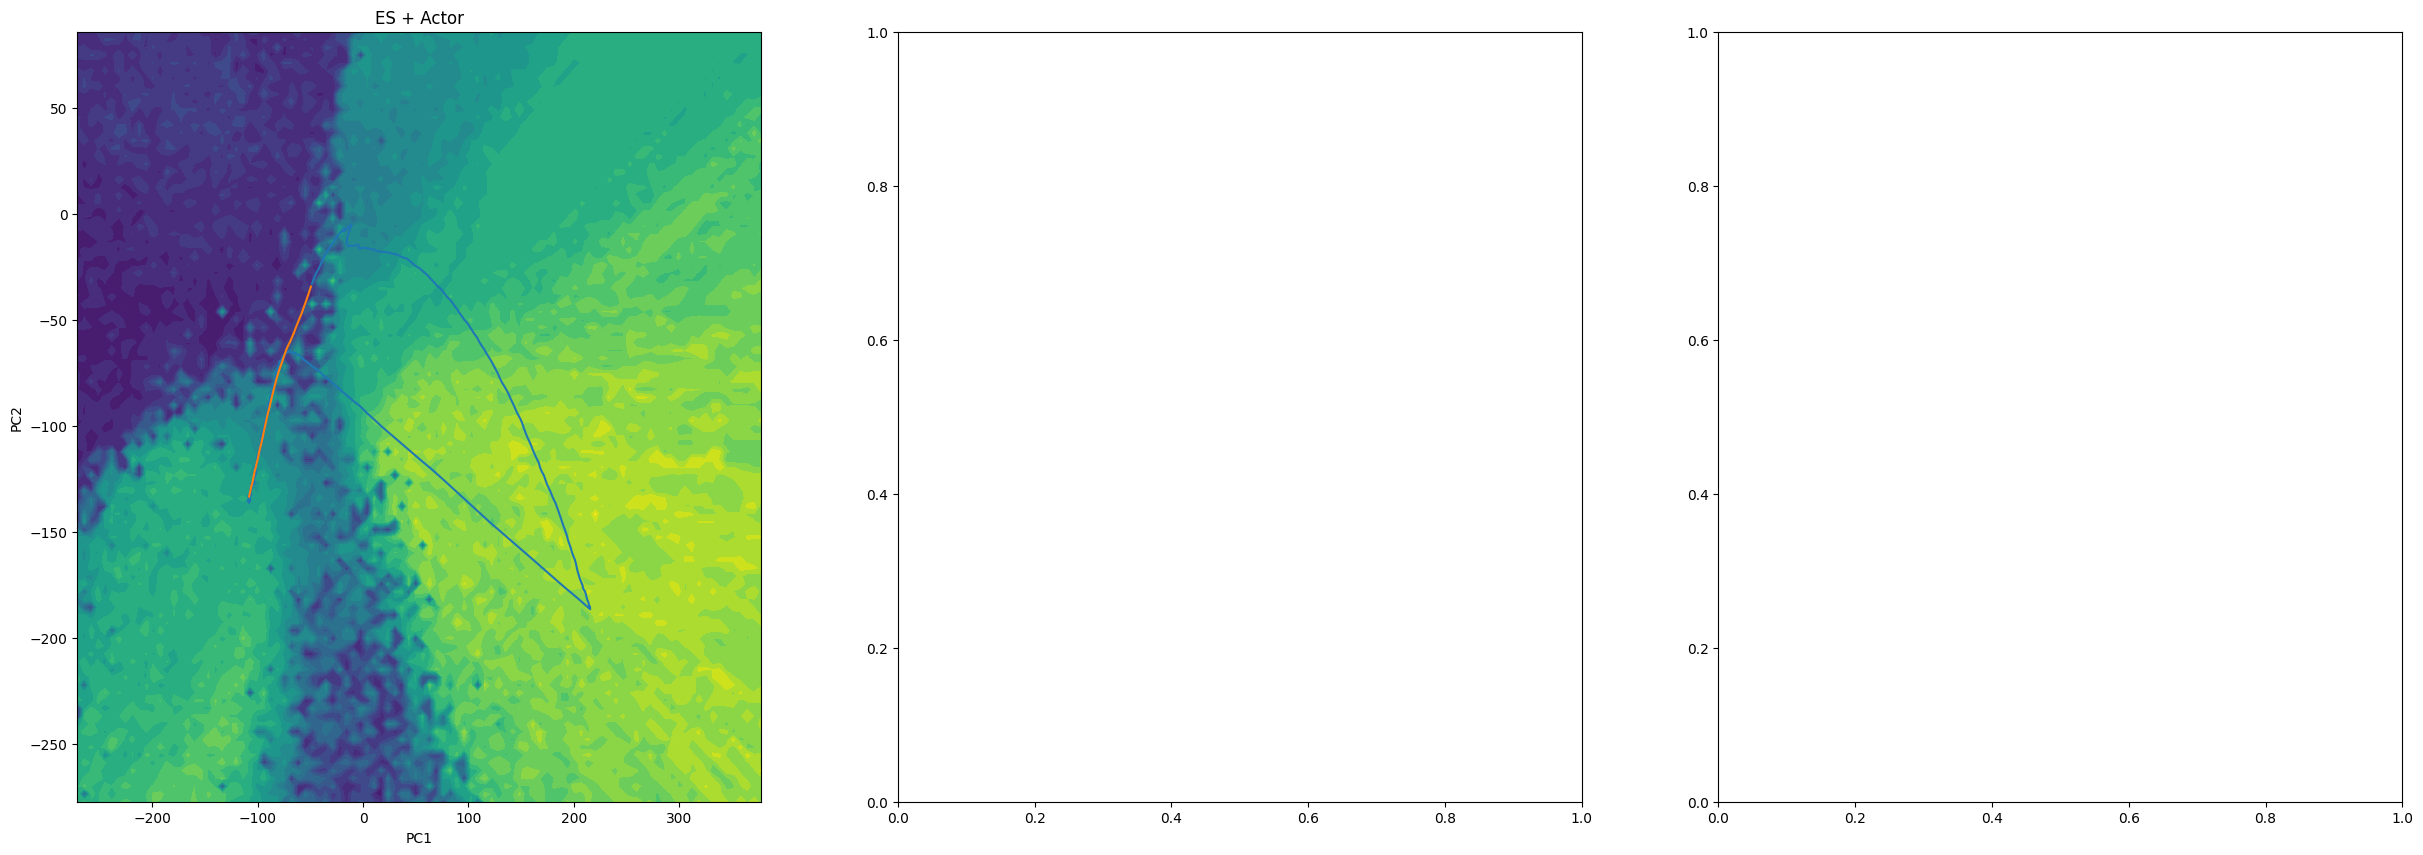

In [86]:
path = ["ES", "Actor"]
multi_pca = MultiPOV_PCA([Path(path_names[p], name=p) for p in path])

multi_pca.sample_grid(n_points, dx=0.5)

unflatten_fn = jax.vmap(emitter.es_emitter.unflatten)
scoring_fn = EM.scoring_fn
multi_pca.fitness_grid(unflatten_fn, scoring_fn);

multi_pca.make_gif()

In [106]:
from matplotlib.animation import FuncAnimation, PillowWriter

self = multi_pca

n_axes = len(self.pca)
fig, axes = plt.subplots(1, n_axes+1, figsize=(10*(n_axes + 1), 10))
fit_ax = axes[-1]
axes = axes[:-1]

def init_func(i):
    ax = axes[i]
    pca = self.pca[i]
    print(pca)
    print(pca.true_fit)

    n_points = int(jnp.sqrt(pca.true_fit.shape[0]))
    x = pca.samples[:, 0]
    x_grid = x.reshape((n_points, n_points))
    y = pca.samples[:, 1]
    y_grid = y.reshape((n_points, n_points))
    z_grid = pca.true_fit.reshape((n_points, n_points))
    ax.contourf(x_grid, y_grid, z_grid, 20, cmap="viridis", zorder=1)
    # colorbar
    # fig.colorbar(ax.collections[0], ax=ax, location="left", use_gridspec=True)
    # title = " + ".join([p.name for p in pca.paths])
    var = jnp.sum(pca.pca.explained_variance_ratio_) 
    title = f"POV : {pca.reference} | var {var:.2f}"
    ax.set_title(title)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.legend()
    for p in pca.paths:
        p.line = ax.plot(p.projected[:, 0], p.projected[:, 1], label=p.name, zorder = 2)[0]

for i in range(n_axes):
    init_func(i)

# Set fitness plot
fit_ax.set_xlabel("Generation")
fit_ax.set_ylabel("Fitness")
fit_ax.set_title("Fitness")
plt.legend()
pca = self.pca[0]
for p in pca.paths:
    p.fit_plot = fit_ax.plot(p.gens, p.fitnesses, label=p.name)[0]

def update_func(frame, i):
    pca = self.pca[i]
    # Update the data
    for p in pca.paths:
        p.line.set_data(p.projected[:frame, 0], p.projected[:frame, 1])

def update(frame):
    print(f"GIF {frame}", end="\r")

    for i in range(n_axes):
        update_func(frame, i)

    # update fitness plot
    pca = self.pca[0]
    for p in pca.paths:
        p.fit_plot.set_data(np.arange(frame), p.fitnesses[:frame])

    gen = pca.paths[0].gens[frame]

    # update title with generation
    fit_ax.set_title(" + ".join([p.name for p in self.pca[0].paths]) + f" (gen {gen})")
    return None 

# Create the animation
frames = p.projected.shape[0]
# frames = 200
ani = FuncAnimation(fig, update, frames=frames, interval=1)

ani.save('animation.gif', writer=PillowWriter(fps=20))

plt.close()

StepPCA of ES - Actor - ref ES
[2559.849  2947.453  2681.5537 ... 2512.886  2375.6538 2451.5183]
StepPCA of ES - Actor - ref Actor
[1940.1726  1891.1345  1884.2689  ... -670.40936 -567.58014 -601.3044 ]


(1000, 19718)
(1000, 19718)
Explained variance [0.44669327 0.13580643]


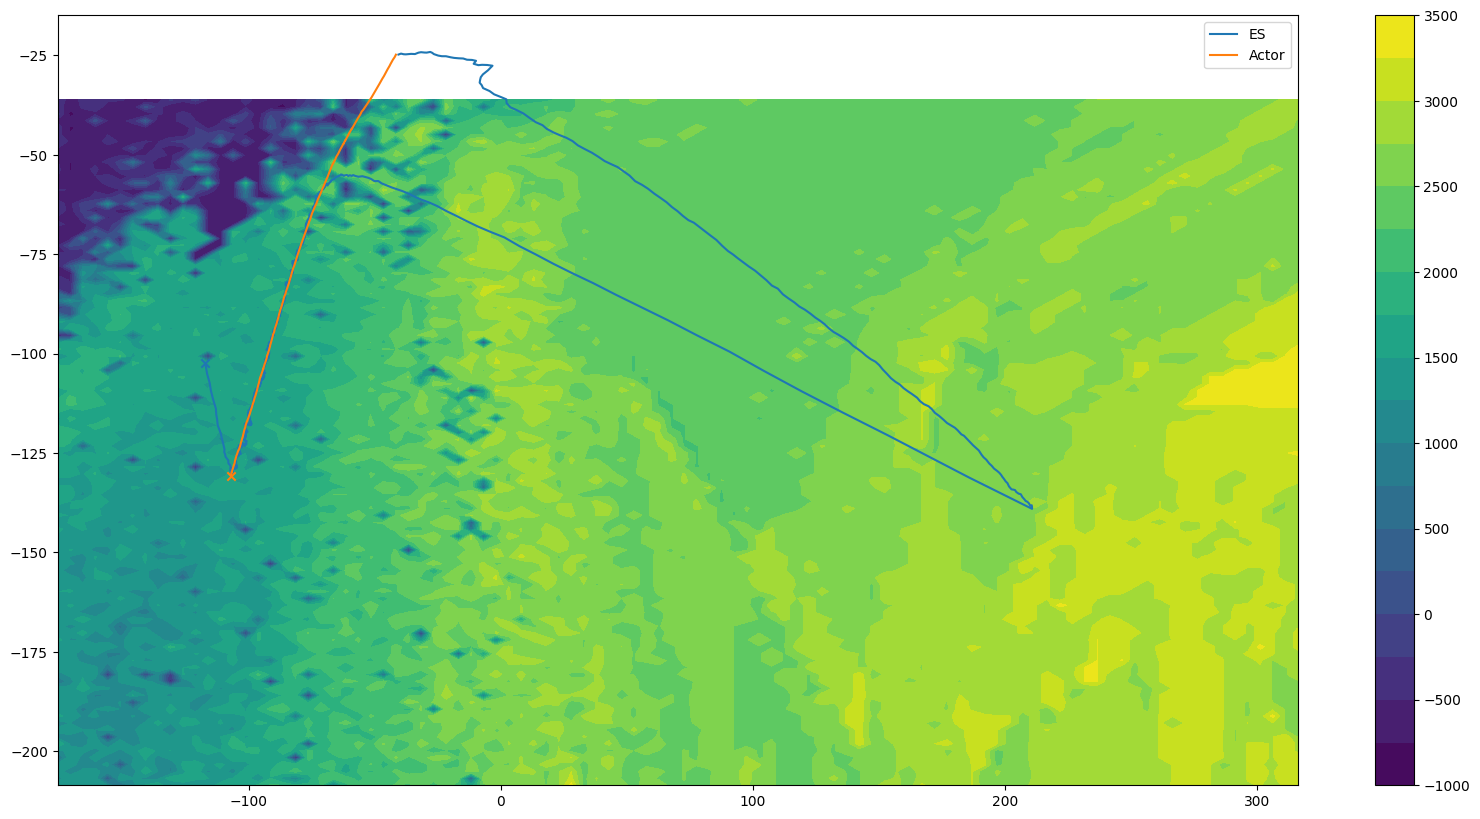

In [36]:
offsprings = Path(save_path + "/gen_*_offspring.npy", name="ES")
actor = Path(save_path + "/gen_*_actor.npy", name="Actor")
steppca = StepPathPCA([offsprings, actor])

n_points = 100
steppca.sample_grid(n_points, dx=0.5)
# steppca.genomes.shape, steppca.samples.shape

unflatten_fn = jax.vmap(emitter.es_emitter.unflatten)
scoring_fn = EM.scoring_fn
steppca.fitness_grid(unflatten_fn, scoring_fn);

steppca.plot()

In [15]:
n_points = 100
pca.sample_grid(n_points, dx=0.5)
pca.genomes.shape, pca.samples.shape

ValueError: shapes (10000,2) and (5,19718) not aligned: 2 (dim 1) != 5 (dim 0)

In [66]:
# Evaluate 
unflatten_fn = jax.vmap(emitter.es_emitter.unflatten)
scoring_fn = EM.scoring_fn
pca.fitness_grid(unflatten_fn, scoring_fn);

In [67]:
from matplotlib.animation import FuncAnimation, PillowWriter

FIT_NORM = {
    "halfcheetah_uni": (-2000, 5000),
    "walker2d_uni": (0, 4000),
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

n_points = int(jnp.sqrt(pca.true_fit.shape[0]))
x = pca.samples[:, 0]
x_grid = x.reshape((n_points, n_points))
y = pca.samples[:, 1]
y_grid = y.reshape((n_points, n_points))
z_grid = pca.true_fit.reshape((n_points, n_points))
ax1.contourf(x_grid, y_grid, z_grid, 20, cmap="viridis", zorder=1)
# colorbar
fig.colorbar(ax1.collections[0], ax=ax1, location="left", use_gridspec=True)

ax1.set_title(" + ".join([p.name for p in pca.paths]))
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")

ax2.set_xlabel("Generation")
ax2.set_ylabel("Fitness")
ax2.set_title("Fitness")

for p in pca.paths:
    p.line = ax1.plot(p.projected[:, 0], p.projected[:, 1], label=p.name, zorder = 2)[0]
    p.fit_plot = ax2.plot(p.fitnesses, label=p.name)[0]
ax1.legend()

%matplotlib inline

def update(frame):
    # Update the data
    print(frame, end="\r")
    for p in pca.paths:
        p.line.set_data(p.projected[:frame, 0], p.projected[:frame, 1])
        p.fit_plot.set_data(np.arange(frame), p.fitnesses[:frame])
    # update title with generation
    plt.title(" + ".join([p.name for p in pca.paths]) + f" (gen {frame})")
    return line,

# Create the animation
frames = p.projected.shape[0]
# frames = 200
ani = FuncAnimation(fig, update, frames=frames, interval=1)

# Save the animation as a GIF
ani.save(f"animation_{start_gen}.gif", writer=PillowWriter(fps=20))

# Show the plot
# plt.show()

# show gif
plt.close()

Line2D(_child0)


In [ ]:
pca.plot_3d()

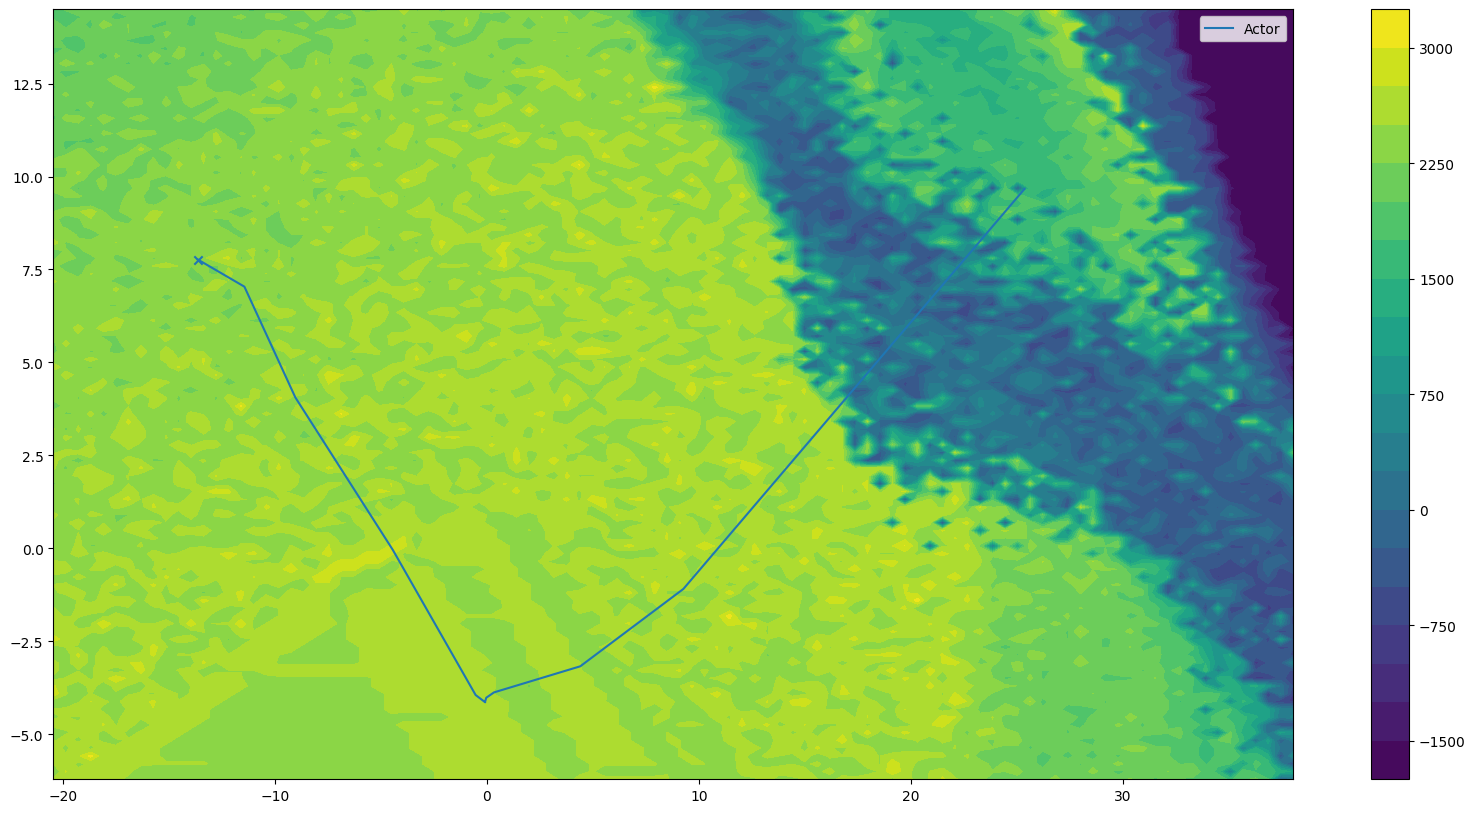

In [ ]:
pca.plot()

In [20]:
path = offsprings
n_points = 100000
max_gen = jnp.array(path.gens).max()
min_gen = jnp.array(path.gens).min()
min_gen, max_gen

(DeviceArray(1, dtype=int32), DeviceArray(600, dtype=int32))

In [52]:
genomes = path.export_genomes()
# Compute distance between consecutive genomes
distances = jnp.linalg.norm(genomes[1:] - genomes[:-1], axis=-1)
# Add 0 first
distances = jnp.concatenate([jnp.array([0]), distances])
distances

DeviceArray([  0.     , 191.3382 , 190.37509, 191.21297, 190.55028,
             188.84491, 189.72601, 192.27274, 192.4424 , 190.6584 ,
             190.37251, 192.07237, 190.04803], dtype=float32)

In [111]:
# For each interval, sample points
genomes = path.export_genomes()
# Compute distance between consecutive genomes
distances = jnp.linalg.norm(genomes[1:] - genomes[:-1], axis=-1)
# Add 0 first
distances = jnp.concatenate([jnp.array([0]), distances])

max_n_points = 10000
n_intervals = len(path.gens) - 1
n_points_per_interval = int(jnp.minimum(max_n_points, jnp.ceil(n_points / n_intervals)))
print(n_points_per_interval)

interp_genomes = [jnp.array([genomes[0]])]
x_axis = [jnp.array([0])]

for i in range(1, len(path.gens)):
    g0 = genomes[i - 1]
    g1 = genomes[i]
    d = jnp.linalg.norm(g1 - g0)
    x = jnp.linspace(0, 1, n_points_per_interval)
    x = x[1:]
    genes = g0 + x[:, None] * (g1 - g0)
    interp_genomes.append(genes)
    scaled_x = x * d + x_axis[-1][-1]
    x_axis.append(scaled_x)

interp_genomes = jnp.concatenate(interp_genomes)
x_axis = jnp.concatenate(x_axis)

interp_genomes.shape, x_axis.shape

84


((997, 19718), (997,))

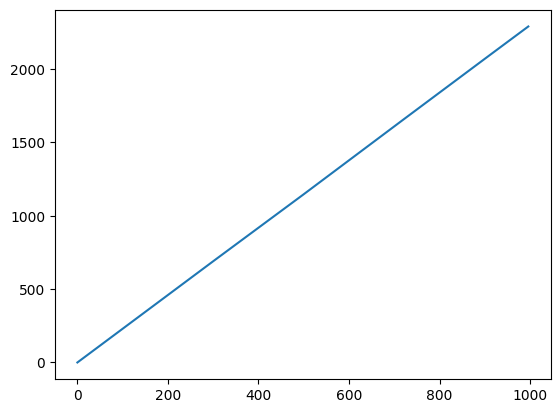

In [112]:
plt.plot(x_axis)

In [113]:
nets = unflatten_fn(interp_genomes)
key = jax.random.PRNGKey(0)
fitnesses, _, _, _ = scoring_fn(nets, key)

In [117]:
def multi_eval(nets, scoring_fn, n_eval):
    fitnesses = []
    key = jax.random.PRNGKey(0)
    from tqdm import tqdm
    for g in tqdm(range(n_eval)):
        f, _, _, _ = scoring_fn(nets, key)
        fitnesses.append(f)
    return jnp.array(fitnesses).mean(axis=0)

In [118]:
fitnesses = multi_eval(nets, scoring_fn, 10)

100%|██████████| 10/10 [00:34<00:00,  3.41s/it]


In [119]:
center_nets = unflatten_fn(path.export_genomes())
center_fitnesses = multi_eval(center_nets, scoring_fn, 10)

100%|██████████| 10/10 [00:24<00:00,  2.48s/it]


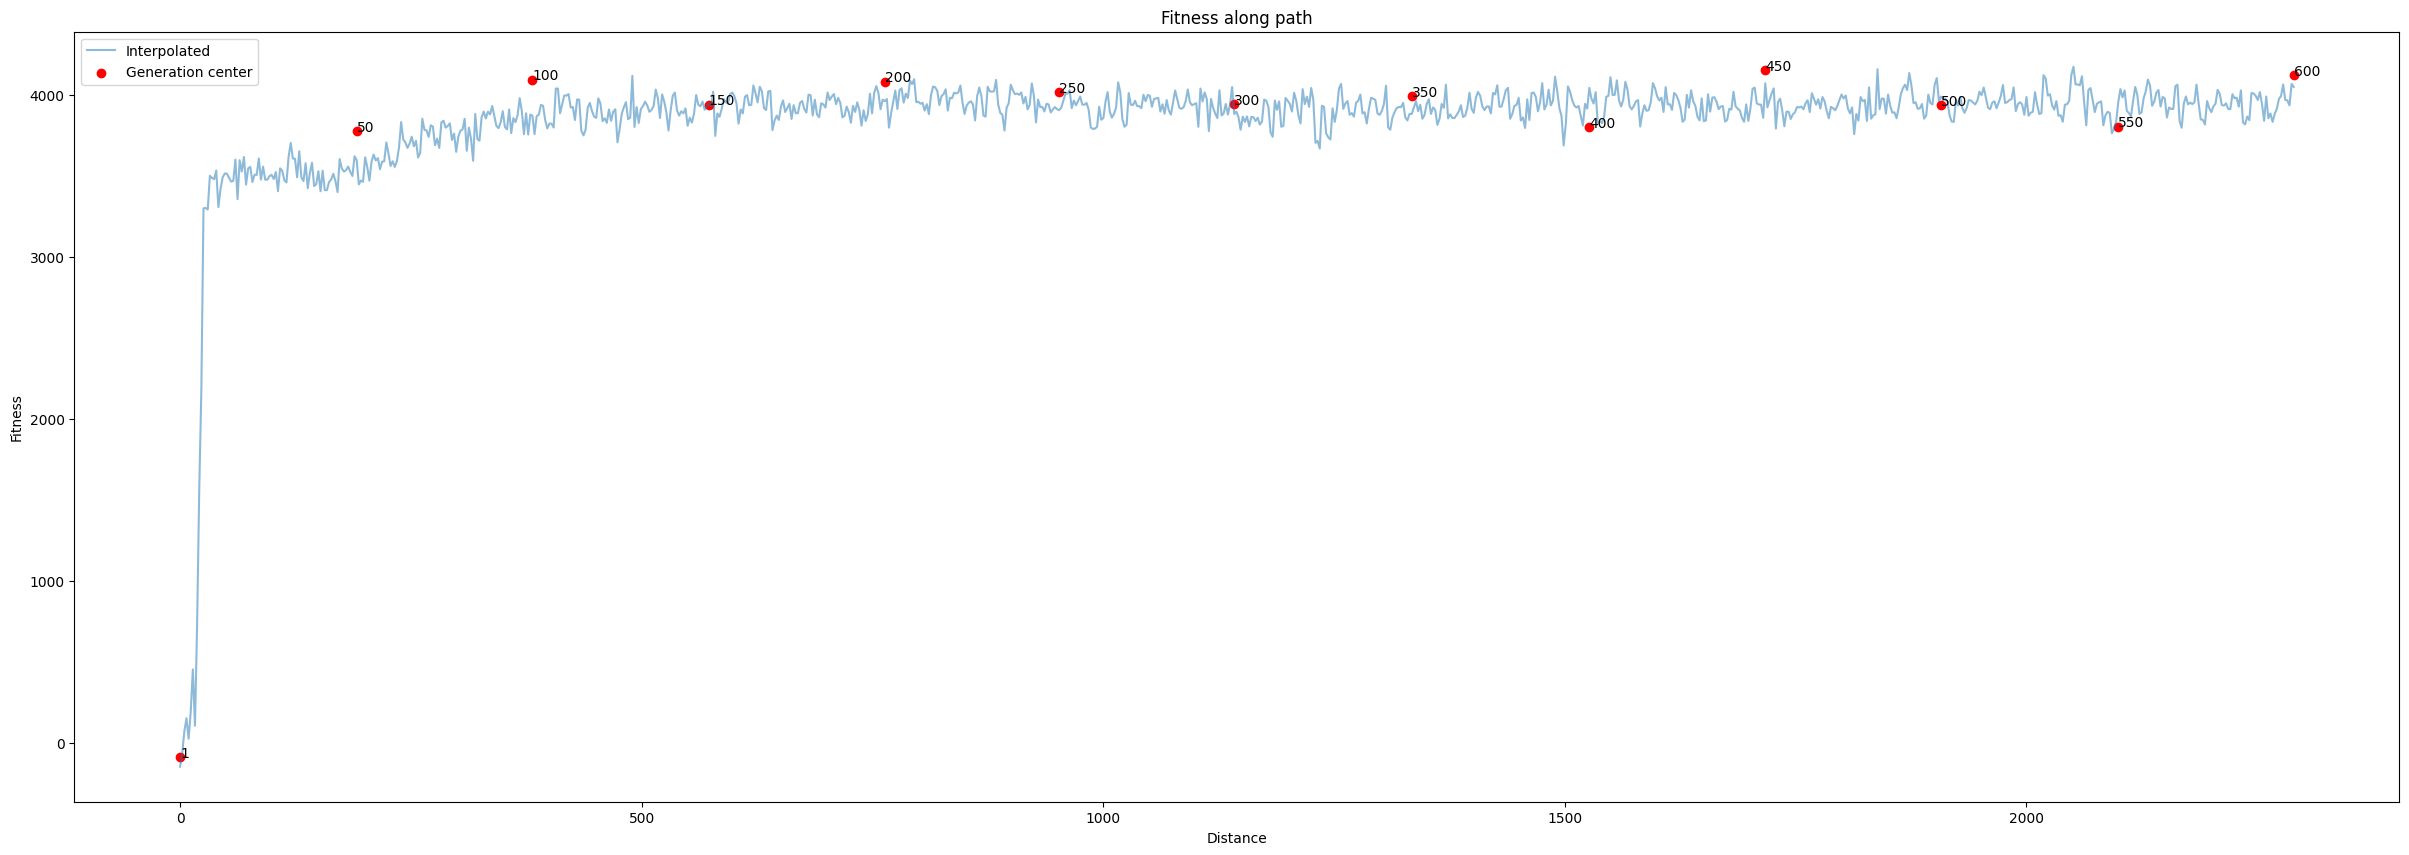

In [128]:
# large figure
plt.figure(figsize=(30, 10))
plt.plot(x_axis, fitnesses, alpha=0.5, label="Interpolated")
plt.scatter(distances.cumsum(), center_fitnesses, color="red", label="Generation center")
# Add labels for generation under scatter
for i, gen in enumerate(path.gens):
    plt.text(distances.cumsum()[i], center_fitnesses[i], str(gen), color="k")
plt.xlabel("Distance")
plt.ylabel("Fitness")
plt.title("Fitness along path")
plt.legend()

In [18]:
from landscape_analysis_2d import plot2d, plot3d

In [19]:
def surrogate_eval(genomes, emitter_state):
    random_key = jax.random.PRNGKey(0)

    networks = jax.vmap(emitter.es_emitter.unflatten)(genomes)

    fitnesses, descriptors, extra_scores, random_key = emitter.surrogate_evaluate(
        networks, 
        random_key=random_key,
        emitter_state=emitter_state,
    )

    return fitnesses

In [20]:
nets = jax.vmap()(pca.genomes)

In [21]:
key = jax.random.PRNGKey(0)
fitnesses, descriptors, extra_scores, random_key = scoring_fn(nets, key)

In [22]:
x_grid = x.reshape((n_points, n_points))
y_grid = y.reshape((n_points, n_points))
z_grid = fitnesses.reshape((n_points, n_points))

NameError: name 'x' is not defined

In [ ]:
%matplotlib inline

def plot2d(X, Y, Z, save=None, title="2d interpolation", X_2d=None):
    plt.figure(figsize=(20, 10))
    plt.contourf(X, Y, Z, 20, cmap="viridis")
    plt.legend()
    plt.colorbar()
    f_min, f_max = Z.min(), Z.max()
    plt.clim(f_min, f_max)

    if X_2d is not None:
        prev = None

        for X in X_2d:
            # X = pca.transform(X.reshape(-1, X.shape[-1]))
            plt.scatter(X[0], X[1], color="red")
            if prev is not None:
                # Arrow from prev to current
                plt.arrow(
                    prev[0], prev[1], 
                    X[0] - prev[0], 
                    X[1] - prev[1], 
                    color="red", 
                    # alpha=0.5,
                    )
            prev = X

    plt.xlabel("v1: ES to actor")
    plt.ylabel("v2")
    plt.title(title)
    # same scale both axis
    plt.gca().set_aspect('equal', adjustable='box')
    # save
    if save is not None:
        plt.savefig(save)
    plt.show()

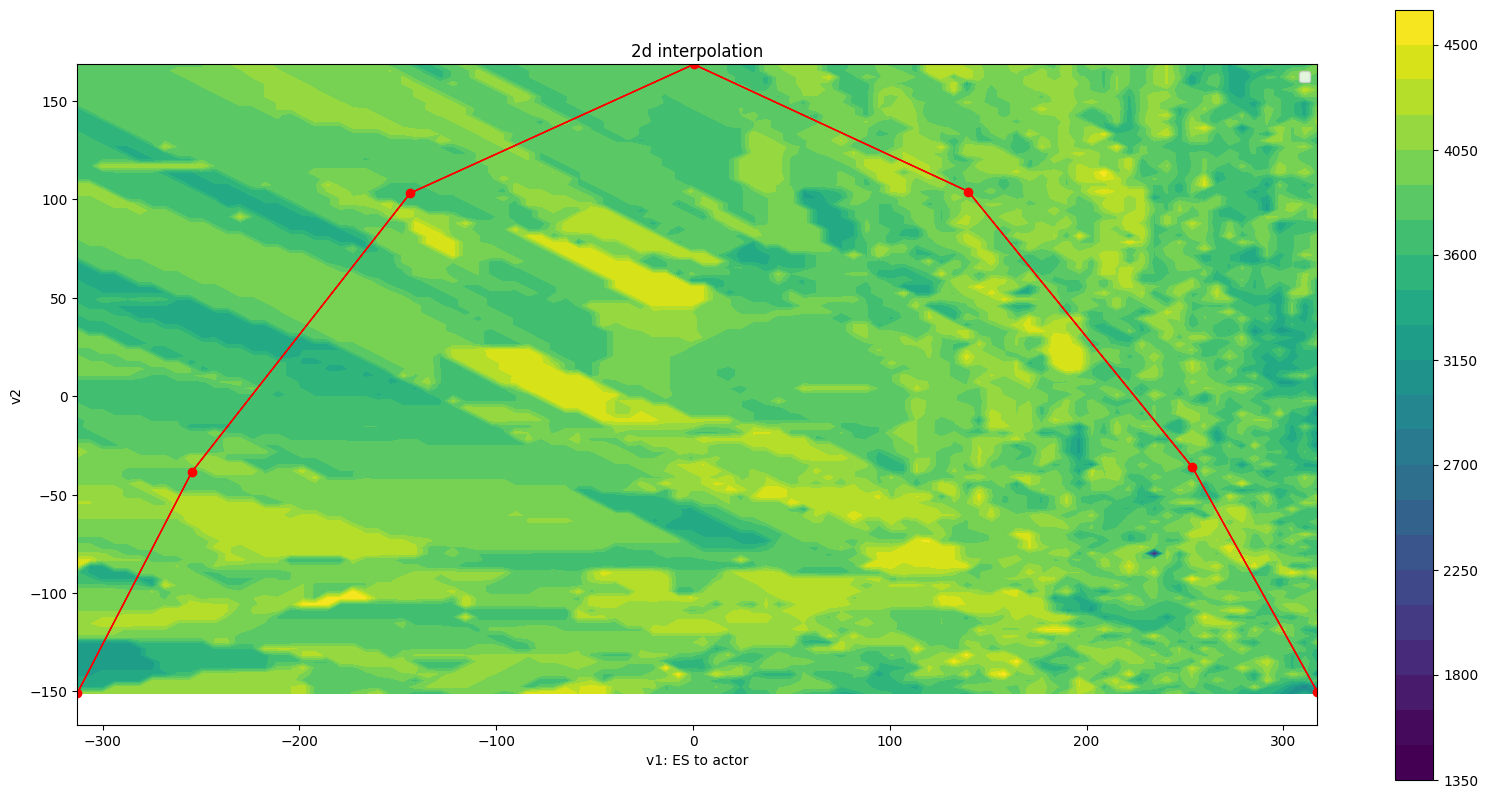

In [94]:
plot2d(x_grid, y_grid, z_grid, X_2d=X_2d)

In [102]:
import plotly.graph_objs as go
import numpy as np
import plotly.offline as pyo

def plot3d(X, Y, Z, save=None):
    # Create a 3D surface plot
    fig = go.Figure(data=[go.Surface(
        x=X,
        y=Y,
        z=Z,
        colorscale='Viridis'
    )])

    min_z = Z.min()
    max_z = Z.max()

    x_size = X.max() - X.min()
    y_size = Y.max() - Y.min()
    # get as float from jax array
    x_size = float(x_size)
    y_size = float(y_size)

    # Add vertical lines
    fig.add_trace(go.Scatter3d(
        x=[0, 0],
        y=[0, 0],
        z=[min_z, max_z],
        marker=dict(line=dict(width=10)),
        mode='lines',
        name='ES'
    ))

    fig.add_trace(go.Scatter3d(
        x=[1, 1],
        y=[0, 0],
        z=[min_z, max_z],
        marker=dict(line=dict(width=10)),
        mode='lines',
        name='actor'
    ))
    
    # Set the axis labels and title
    fig.update_layout(scene=dict(
        xaxis_title='ES to actor',
        yaxis_title='Y',
        zaxis_title='Fitness',
        aspectratio=dict(x=x_size, y=y_size, z=0.7),
        camera_eye=dict(x=1.2, y=1.2, z=0.6)
    ))

    # Show the plot in a web browser
    if save is not None:
        pyo.plot(fig, filename=save, auto_open=True)
    fig.show()

plot3d(x_grid, y_grid, z_grid)

In [15]:
# get 2 axis of variation
# Get all descriptors
v1, v2 = pca.components_
v1, v2 = jnp.array(v1), jnp.array(v2)

In [16]:
v1.shape

(19718,)

In [17]:
pca.transform(v1.reshape(1, -1)), pca.transform(v2.reshape(1, -1))

(array([[ 318.24823, -150.26405]], dtype=float32),
 array([[ 317.24826, -149.26402]], dtype=float32))

ValueError: shapes (10000,19718) and (2,19718) not aligned: 19718 (dim 1) != 2 (dim 0)

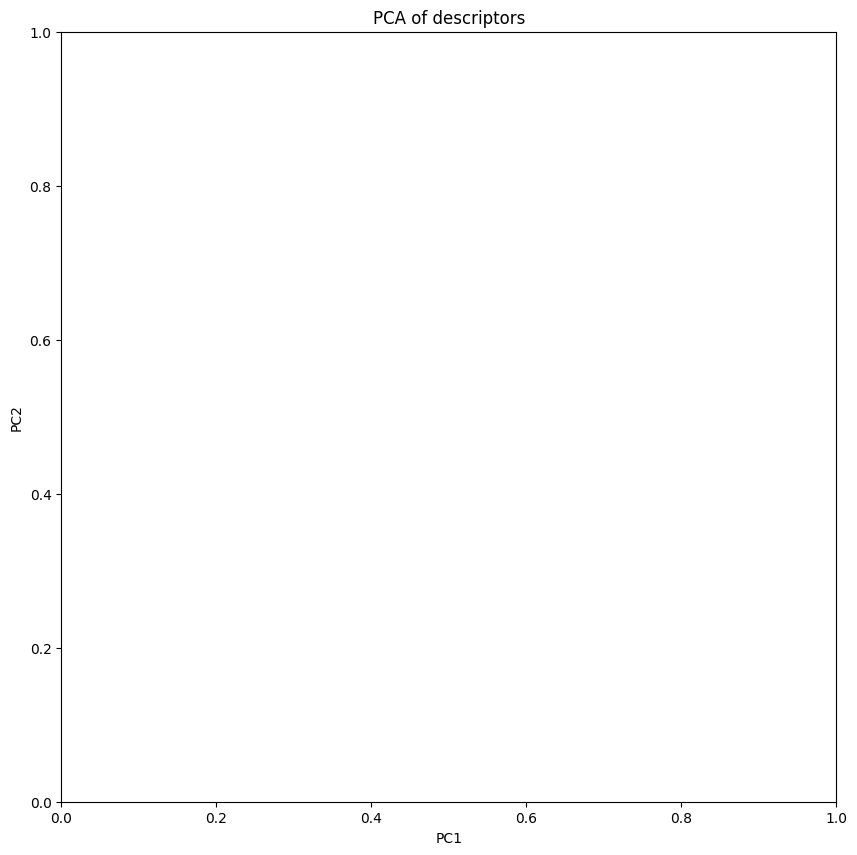

In [30]:
n = 100
# scatter plot with arrows
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("PCA of descriptors")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# Interpolate as grid
x, y = jnp.meshgrid(
    jnp.linspace(min_v1, max_v1, n), 
    jnp.linspace(min_v2, max_v2, n)
)
x = x.reshape((-1, 1))
y = y.reshape((-1, 1))
genomes = x * v1 + y * v2

# Get in high dim
genomes = pca.inverse_transform(genomes)
genomes.shape

## Get last image of gif

In [3]:
from PIL import Image

In [4]:
job = "1105500"
# job = "1106764"
path = f"/home/paul/Results/{job}/animated_path_ES_Actor.gif"
save_path = f"/home/paul/Results/{job}/last_frame.png"

# with Image.open(path) as im:
#     print(im.n_frames)
#     # Last frame
#     frame = im.seek(im.n_frames-1)
#     im.save(save_path)

In [7]:
frame_nb = 180

with Image.open(path) as im:
    # Converge frame
    frame = im.seek(frame_nb)
    save_path = f"/home/paul/Results/{job}/frame_{frame_nb}.png"
    im.save(save_path)